Si analizzerà il dataset "Fake Job Prediction" che, come suggerisce il titolo, presenta tweets inerenti ad
annunci di lavoro classificati come veritieri o meno.

Per prima cosa, si carica il dataset da analizzare:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("./fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Da uno sguardo all'inizio del set di dati, troviamo le seguenti funzionalità:

job_id: intuitivamente, questo è solo l'ID univoco per ogni singola voce nel set di dati;

title: il titolo dell'annuncio;

location: la posizione del lavoro nel formato: Paese, Stato, Città;

dipartment: indica il dipartimento aziendale in cui inserire la figura richiesta;

salary_range: l'intervallo salariale per la posizione;

company_profile: una panoramica dell'azienda;

description: una panoramica della descrizione del lavoro;

requirements: una panoramica dei requisiti necessari;

benefits: una panoramica dei vantaggi offerti da questo lavoro / azienda;

telecommuting: se questo lavoro è telecommuting (1) o meno (0);

has_company_logo: se questo annuncio di lavoro ha o meno il logo dell'azienda;

has_questions: se questo annuncio di lavoro ha un questionario in allegato;

employment_type: se questo lavoro è part-time, full-time, ecc;

required_experience: esperienza richiesta;

required_education: quale grado d'istruzione è necessario;

industry: settore lavorativo: moda, informatica, ecc;

function: keyword riassuntiva della posizione lavorativa;

fraudolent: etichetta target, 0 se posto di lavoro reale, 1 se posto di lavoro falso.


In [15]:
print(df.shape)

(17880, 18)


Il dataset è composto da 17880 righe contenenti 18 attributi per riga.

Per prima cosa si valuta la loro consistenza, controllando il quantitativo di valori nulli 
per ogni colonna.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


Questa analisi porta ad escludere, oltre alla colonna job_id ridondante, gli attributi department e salary_range che presentano pochi valori diversi da null e quindi non utili allo studio in oggetto.

Si divide la tabella in due DataFrame, in modo da semplificare le operazioni successive:

In [18]:
df1 = df[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]
df1 = df1.fillna("None")
df2 = df[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function","fraudulent"]]
df2 = df2.fillna("None")

In [19]:
df1.head()

,title,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,None,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,None,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


In [20]:
df2.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,None,None,Marketing,0
1,0,1,0,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0
2,0,1,0,None,None,None,None,None,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Si analizza il quantitativo di Tweet identificati come veri o falsi:

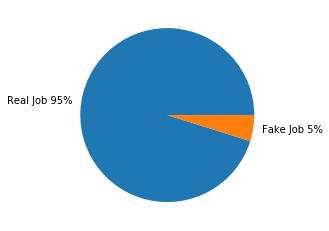

In [71]:
pie=df1["fraudulent"].value_counts()
real=np.round((pie[0]/len(df1["fraudulent"]))*100).astype(int)
fake=np.round((pie[1]/len(df1["fraudulent"]))*100).astype(int)
labels=["Real Job "+str(real)+"%","Fake Job "+str(fake)+"%"]
plt.pie(pie, labels=labels)
plt.show()

Come si può notare il dataset è sbilanciato, presentando il 95% di annunci veritieri e solo il 5% di annunci falsi.
Questa informazione è di grande rilevanza per le analisi successive.

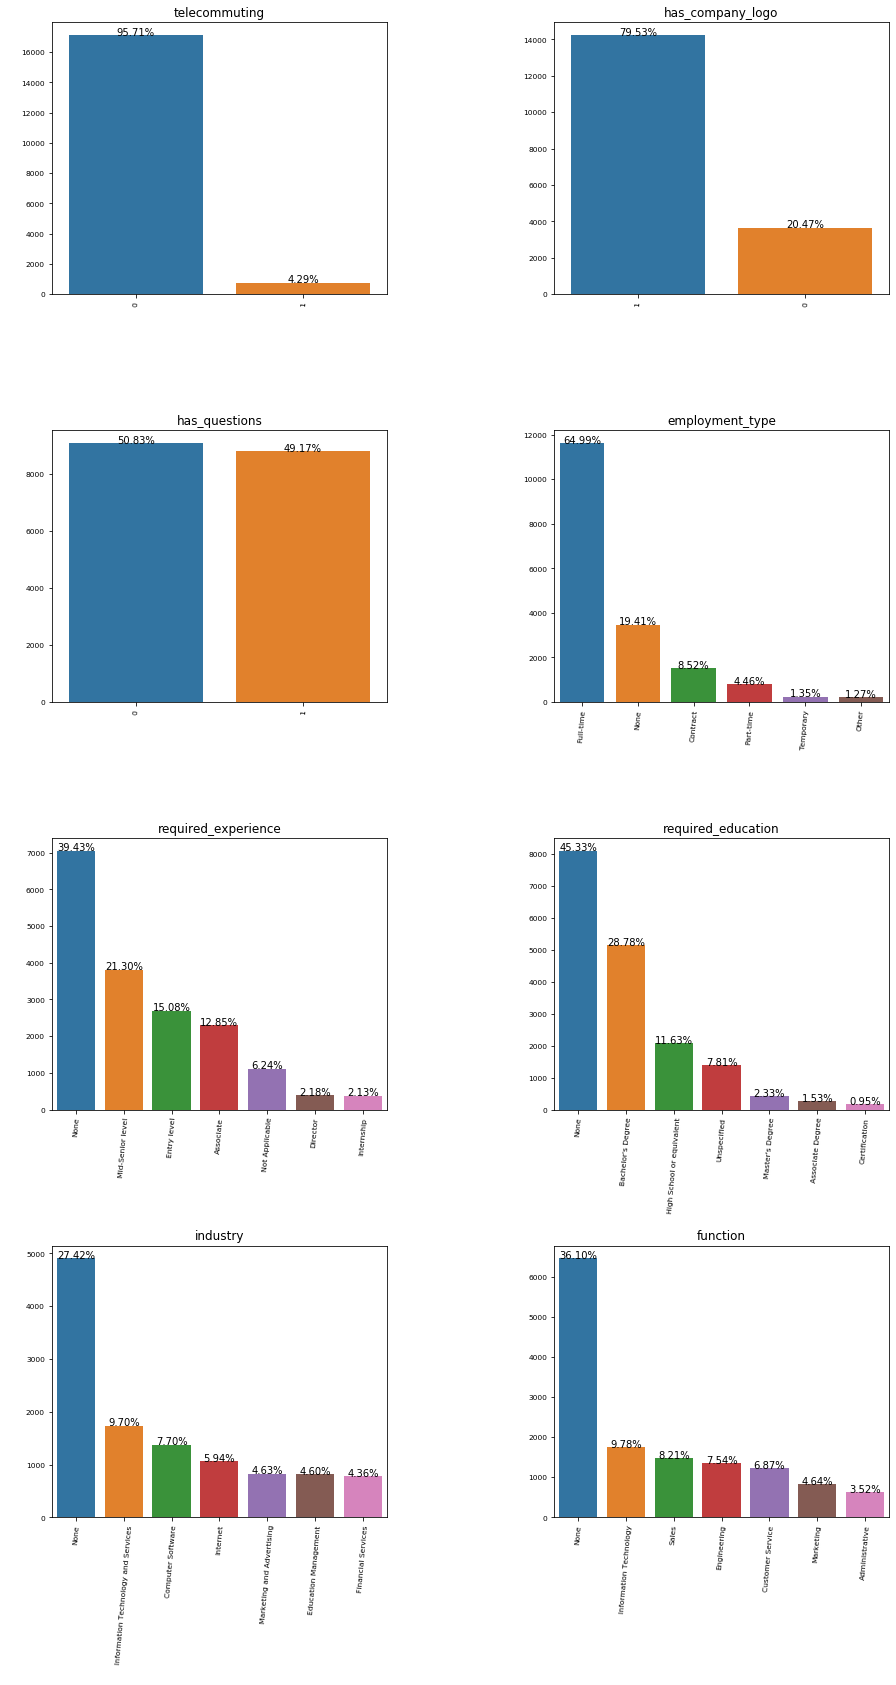

In [163]:
import seaborn as sns
import matplotlib.gridspec as gridspec 


x=df2.copy()
del x['fraudulent']
grid = gridspec.GridSpec(5, 2, wspace=0.5, hspace=0.5) 
plt.figure(figsize=(15,35)) 

for n, col in enumerate(x): 
    ax = plt.subplot(grid[n]) 
    sns.countplot(x=col, data=x, order=x[col].value_counts().iloc[:7].index)  
    plt.xticks(rotation=85)
    ax.tick_params(labelsize=7.5)
    ax.set_title(col)
    ax.set_xlabel(" ")
    ax.set_ylabel(" ")
    sizes=[] 
    for p in ax.patches: 
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10)
plt.show()